# How Unemployment is Affected in Rockland County, NY

The unemployment rate in America is constantly fluxuating. Due to this year's pandemic, the unemployment rate drastically increased. I want to research how the rate has behaved in the past 10 years in my county, Rockland. Considering we live in a country where capitalism is the backbone of our society, it is important to be able to predict the health of our economy. It was evident this year that with high unemployment rates, our economy suffers.

I want to take a look at this year's New York COVID-19 cases vs. the rate of unemployment. As well as looking at who was president within the last 10 years, compared to the average annual unemployment rate. Finally, I want to look at the demographics of Rockland county's workforce vs. the demographics of the entire united states workforce. This would help us understand how Rockland measures up to the entire Untied States. 

I collected all of this information myself and cleaned the data. At first, it was challenging to find data that would help better understand the problem. I used data from the Department of Labor specifically for Rockland County, data from The New York Times to find specific case numbers of COVID-19. This was most challenging as I had to hand calculate numbers in a weekly basis. 

I want to be able to see what party generally had the lowest/highest unemployment rate. I want to see if Rockland County matches the United State's employment demographics.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3

In [20]:
pres_df = pd.read_csv("president.csv")

In [21]:
conn = sqlite3.connect("final.db")

In [22]:
cur = conn.cursor()

In [23]:
pres_df.to_sql('Presidents', conn, if_exists='replace', index = False)

In [24]:
pres_test = pd.read_sql(""" SELECT * FROM Presidents;""", con=conn)
pres_test

,Years,President,Rate,Party
0,2019,Donald Trump,3.7,Republican
1,2018,Donald Trump,3.9,Republican
2,2017,Donald Trump,4.5,Republican
3,2016,Barack Obama,4.3,Democrat
4,2015,Barack Obama,4.6,Democrat
5,2014,Barack Obama,5.4,Democrat
6,2013,Barack Obama,6.4,Democrat
7,2012,Barack Obama,7.4,Democrat
8,2011,Barack Obama,7.2,Democrat
9,2010,Barack Obama,7.5,Democrat


In [25]:
max_rate = pd.read_sql(""" SELECT President, MAX(Rate) FROM Presidents GROUP BY Party;""", con=conn)
max_rate

,President,MAX(Rate)
0,Barack Obama,7.5
1,George HW Bush,6.3


In [26]:
count_pres = pd.read_sql(""" SELECT Party, count(President) FROM Presidents GROUP BY Party;""", con=conn)
count_pres

,Party,count(President)
0,Democrat,16
1,Republican,14


In [28]:
pres_df.head()

,Years,President,Rate,Party
0,2019,Donald Trump,3.7,Republican
1,2018,Donald Trump,3.9,Republican
2,2017,Donald Trump,4.5,Republican
3,2016,Barack Obama,4.3,Democrat
4,2015,Barack Obama,4.6,Democrat


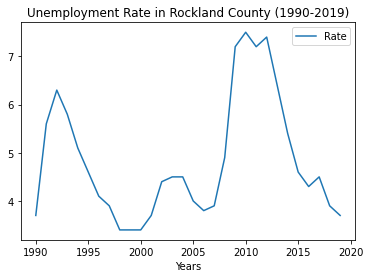

In [29]:
pres_df.plot(x = "Years", y = "Rate", title = "Unemployment Rate in Rockland County (1990-2019)")

In [30]:
difference = pd.read_sql("""
select
  Rate,
  sum(case when Party="Republican" then 1 end) as "Republican",
  sum(case when Party="Democrat" then 1 end) as "Democrat"
from
  Presidents
  group by 1;
""", con = conn)
difference

,Rate,Republican,Democrat
0,3.4,NaN,3.0
1,3.7,3.0,NaN
2,3.8,1.0,NaN
3,3.9,2.0,1.0
4,4.0,1.0,NaN
5,4.1,NaN,1.0
6,4.3,NaN,1.0
7,4.4,1.0,NaN
8,4.5,3.0,NaN
9,4.6,NaN,2.0


These statistics show which party was in power and what the worse employment rate for each party is. The graphic is to show the rate over the last ten years.

In [31]:
covid_df = pd.read_csv("covid.csv")

In [34]:
covid_df.head()

,Date,Total Number of Cases,New Cases
0,1/1/20,0.0,0.0
1,1/8/20,0.0,0.0
2,1/15/20,0.0,0.0
3,1/22/20,0.0,0.0
4,1/29/20,0.0,0.0


In [35]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   51 non-null     object 
 1   Total Number of Cases  51 non-null     float64
 2   New Cases              51 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


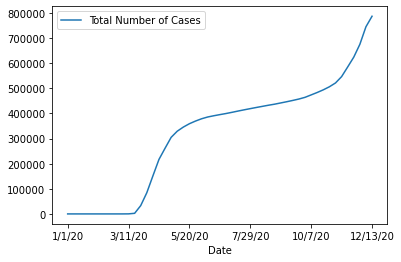

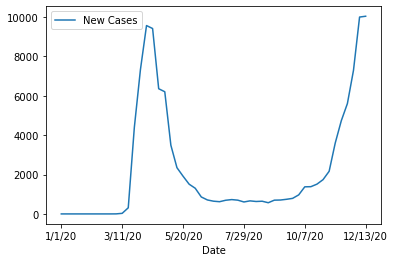

In [36]:
covid_df.plot(x = "Date", y= "Total Number of Cases")
covid_df.plot(x = "Date", y= "New Cases")

These graphics are to show when the corona virus started to affect New York. The first cases bagan in March. 

In [38]:
year2020_df = pd.read_csv("rate2020.csv")

In [39]:
year2020_df.head()

,Date,Rate,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,1/1/20,4.0,NaN,NaN,NaN
1,2/5/20,3.9,NaN,NaN,NaN
2,3/4/20,4.0,NaN,NaN,NaN
3,4/1/20,14.4,NaN,NaN,NaN
4,5/6/20,11.3,NaN,NaN,NaN


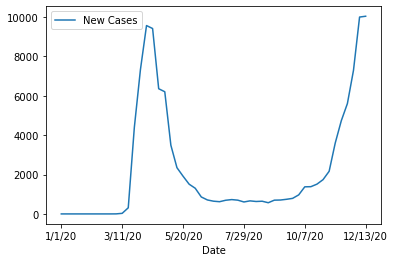

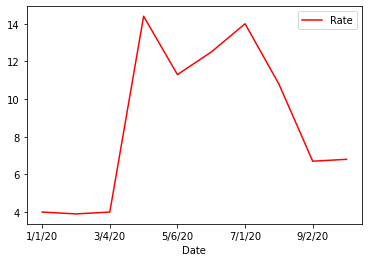

In [40]:
covid_df.plot(kind='line',x='Date',y='New Cases')
year2020_df.plot(kind='line',x='Date',y='Rate', color='red')

This graphic is to show how the unemployment rate spiked in March, when the first cases of COVID came to New York

In [41]:
demo_df = pd.read_csv("demographics.csv")

In [42]:
demo_df.head()

,Ethnicity,% of Workforce in Rockland,% of Total Workforce USA
0,White,62.7,77.5
1,African American,13.1,12.7
2,Asian,6.2,6.3
3,Hispanic,18.4,NaN
4,Other,2.8,3.4


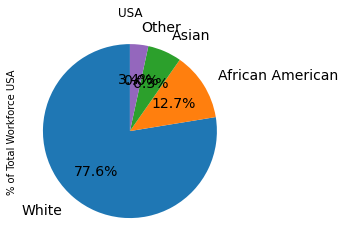

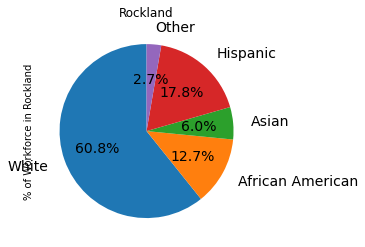

In [44]:
demo_df.plot(kind='pie', y = '% of Total Workforce USA', autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=demo_df['Ethnicity'], title = 'USA', legend = False, labeldistance=1.2, fontsize=14)

demo_df.plot(kind='pie', y = '% of Workforce in Rockland', autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=demo_df['Ethnicity'], title = 'Rockland', labeldistance=1.2, legend = False, fontsize=14)

Finally, these two pie charts compare the demographics of the workforce's ethnicitys from both the entire USA and Rockland, NY. I wanted to see if our unemployment rate was related to the people that live in Rockland. Rockland is a prodominant white county, but it makes sense why the unemployment rate is low. They proportioanlly make up for the entire USA's employment demographic.

References: 
https://www.nytimes.com/interactive/2020/us/new-york-coronavirus-cases.html#county
https://www.bls.gov/cps/cpsaat05.pdf
https://www.census.gov/quickfacts/rocklandcountynewyork
https://labor.ny.gov/stats/laus.asp